#### Undirected graph from Adjacency Matrix

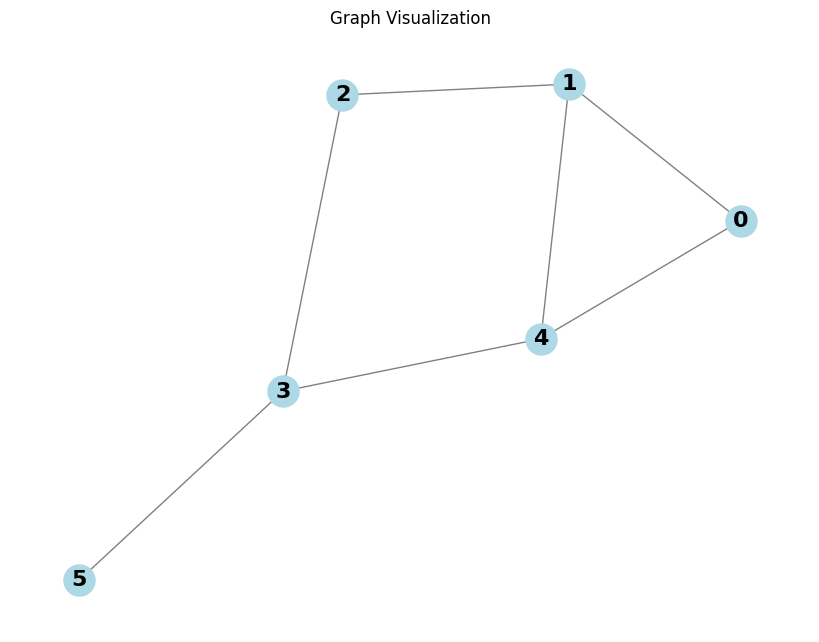

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np  # <-- You need this!

# Generate adjacency matrix
adjm_u = [
    [0, 1, 0, 0, 1, 0],
    [1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 1],
    [1, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0]
]

# Convert to NumPy array
adjm_u = np.array(adjm_u)

# Create undirected graph from adjacency matrix
G = nx.from_numpy_array(adjm_u)

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=500, font_size=16, font_weight='bold',
        edge_color='gray', linewidths=1, font_color='black')
plt.title("Graph Visualization")
plt.show()

#### Directed graph from Adjacency Matrix

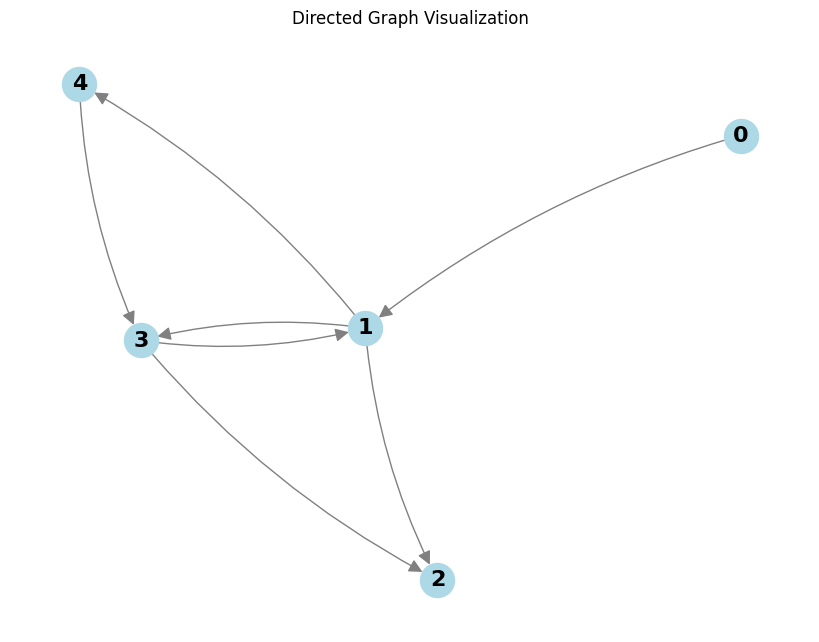

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define directed adjacency matrix
adjm_d = [
    [0, 1, 0, 0, 0],
    [0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 1, 0]
]

# Convert to NumPy array (required for from_numpy_array)
adjm_d = np.array(adjm_d)

# Create a *directed* graph
G = nx.from_numpy_array(adjm_d, create_using=nx.DiGraph) # create_using=nx.DiGraph

# Visualize the directed graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # seed for reproducibility
nx.draw(G, pos,
        with_labels=True,
        node_color='lightblue',
        node_size=600,
        font_size=16,
        font_weight='bold',
        edge_color='gray',
        arrows=True,           # Show arrows for directed edges
        arrowsize=20,          # Make arrows more visible
        connectionstyle='arc3,rad=0.1'  # Curved edges to avoid overlap
       )
plt.title("Directed Graph Visualization")
plt.show()

#### Edge List: add_edges()

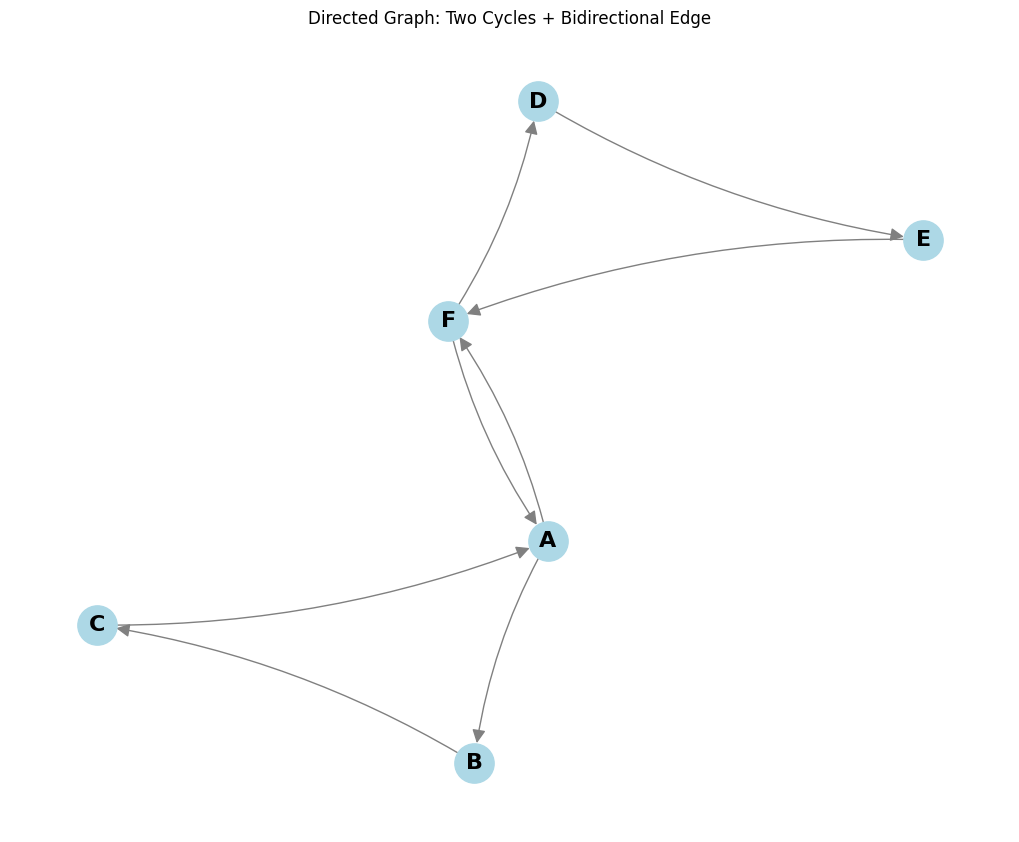

Adjacency Matrix (dense, as in R):
[[0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]]


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add directed edges: A→B→C→A
G.add_edges_from([
    ('A', 'B'),
    ('B', 'C'),
    ('C', 'A')
])

# Add directed edges: D→E→F→D
G.add_edges_from([
    ('D', 'E'),
    ('E', 'F'),
    ('F', 'D')
])

# Add bidirectional edge: A↔F (A→F and F→A)
G.add_edges_from([
    ('A', 'F'),
    ('F', 'A')
])

# --- Optional: Visualize the graph ---
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # positions for nodes

# Draw nodes and edges
nx.draw(G, pos,
        with_labels=True,
        node_color='lightblue',
        node_size=800,
        font_size=16,
        font_weight='bold',
        edge_color='gray',
        arrows=True,
        arrowsize=20,
        connectionstyle='arc3,rad=0.1'  # helps curved edges for bidirectional
       )

plt.title("Directed Graph: Two Cycles + Bidirectional Edge")
plt.show()

# --- Convert to adjacency matrix (as in R's as_adjacency_matrix(..., sparse=F)) ---
# Get node ordering (alphabetical to match R's default)
nodes = sorted(G.nodes())  # ['A', 'B', 'C', 'D', 'E', 'F']
adj_matrix = nx.to_numpy_array(G, nodelist=nodes)

print("Adjacency Matrix (dense, as in R):")
print(adj_matrix)

#### Undirected graph from Edge List

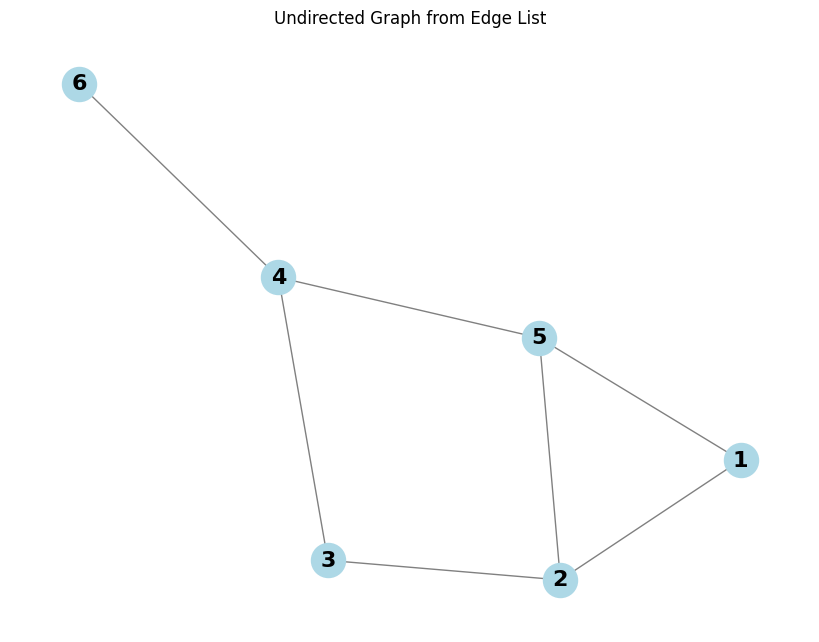

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Edge list 
edge_list = [
    (1, 2),
    (1, 5),
    (2, 3),
    (2, 5),
    (3, 4),
    (4, 5),
    (4, 6)
]

# Create an undirected graph
G = nx.Graph()

G.add_edges_from(edge_list)

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Layout for consistent positioning
nx.draw(G, pos,
        with_labels=True,
        node_color='lightblue',
        node_size=600,
        font_size=16,
        font_weight='bold',
        edge_color='gray',
        linewidths=1,
        font_color='black')
plt.title("Undirected Graph from Edge List")
plt.show()

#### Directed graph from Edge List

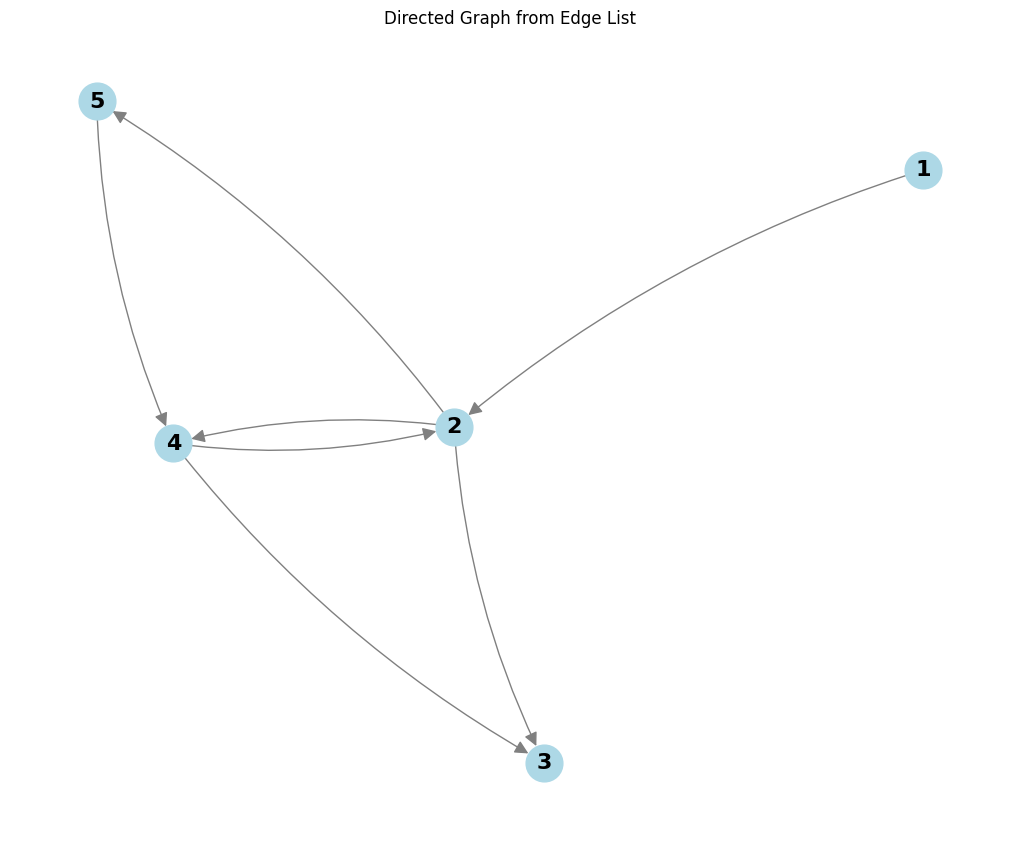

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Directed edge list 
edge_list = [
    (1, 2),  # 1 → 2
    (2, 3),  # 2 → 3
    (2, 4),  # 2 → 4
    (4, 2),  # 4 → 2  (back edge)
    (2, 5),  # 2 → 5
    (4, 3),  # 4 → 3
    (5, 4)   # 5 → 4
]

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edge_list)

# Visualize the directed graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Fixed layout for reproducibility

nx.draw(G, pos,
        with_labels=True,
        node_color='lightblue',
        node_size=700,
        font_size=16,
        font_weight='bold',
        edge_color='gray',
        arrows=True,           # Show direction arrows
        arrowsize=20,          # Larger arrowheads
        connectionstyle='arc3,rad=0.1'  # Curved edges to avoid overlap
       )

plt.title("Directed Graph from Edge List")
plt.show()

#### Basic Characteriscs

In [6]:
import networkx as nx

# Recreate your graph
G = nx.Graph()
G.add_edges_from([
    ('A', 'B'),
    ('B', 'C'),
    ('C', 'A'),
    ('D', 'E'),
    ('E', 'F'),
    ('F', 'D'),
    ('A', 'F')
])

# V(g) equivalent
print("V(g) → Nodes:", list(G.nodes()))

# E(g) equivalent
print("E(g) → Edges:", list(G.edges()))

# gorder(g) equivalent
print("gorder(g) → Number of nodes:", G.number_of_nodes())

# gsize(g) equivalent
print("gsize(g) → Number of edges:", G.number_of_edges())

V(g) → Nodes: ['A', 'B', 'C', 'D', 'E', 'F']
E(g) → Edges: [('A', 'B'), ('A', 'C'), ('A', 'F'), ('B', 'C'), ('D', 'E'), ('D', 'F'), ('E', 'F')]
gorder(g) → Number of nodes: 6
gsize(g) → Number of edges: 7


### Adding Attributes

NetworkX supports **node attributes** (e.g., age, type) and **edge attributes** (e.g., distance, relationship type). Use `set_node_attributes()` and `set_edge_attributes()`.

In [7]:
# Create graph
G = nx.Graph()
G.add_nodes_from([1, 2, 3])

# Assign attributes (e.g., 'color' and 'size')
node_attrs = {
    1: {"color": "red", "size": 100},
    2: {"color": "blue", "size": 200},
    3: {"color": "green", "size": 150}
}
nx.set_node_attributes(G, node_attrs)

# Access
print(G.nodes[1])  # {'color': 'red', 'size': 100}

{'color': 'red', 'size': 100}


C:\Users\user\AppData\Local\Temp\ipykernel_18032\1993534077.py:56: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos,


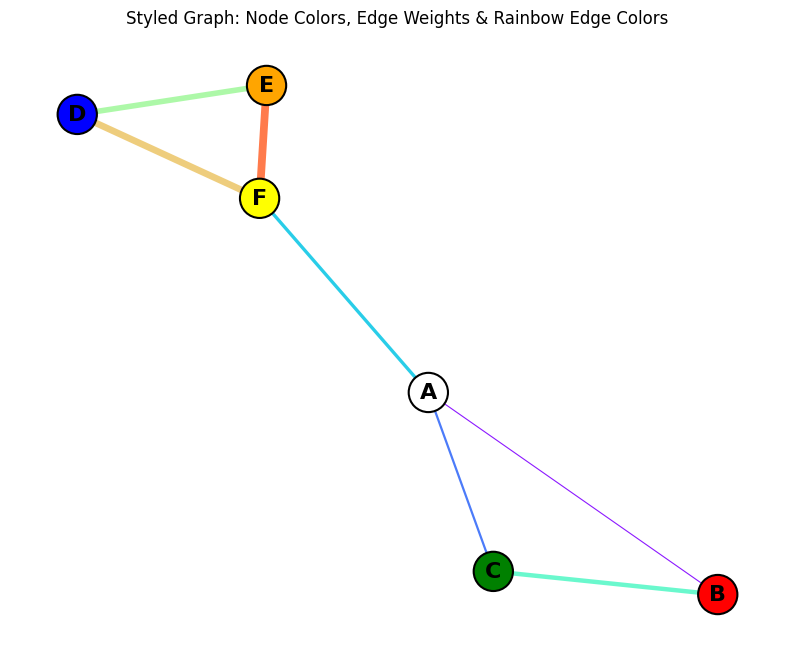

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step 1: Create undirected graph from edge list 
G = nx.Graph()

# Add edges: A-B-C-A (triangle), D-E-F-D (triangle), A-F (connecting edge)
edges = [
    ('A', 'B'),
    ('B', 'C'),
    ('C', 'A'),  # Triangle 1
    ('D', 'E'),
    ('E', 'F'),
    ('F', 'D'),  # Triangle 2
    ('A', 'F')   # Connecting edge → total 7 edges
]

G.add_edges_from(edges)

########
# Step 2: Assign node colors (V(g)$color)
node_colors = {
    'A': 'white',
    'B': 'red',
    'C': 'green',
    'D': 'blue',
    'E': 'orange',
    'F': 'yellow'
}

# Step 3: Assign edge weights (E(g)$weight = 1:7)
weights = list(range(1, 8))  # [1, 2, 3, 4, 5, 6, 7]
for i, edge in enumerate(G.edges()):
    G[edge[0]][edge[1]]['weight'] = weights[i]

# Step 4: Assign edge colors (E(g)$color = rainbow(7))
rainbow_colors = plt.cm.rainbow([i/7 for i in range(7)])  # or use mcolors
edge_color_list = [rainbow_colors[i] for i in range(7)]

# Step 5: Visualize
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

# Draw nodes with custom colors
nx.draw_networkx_nodes(G, pos,
                       node_color=[node_colors[node] for node in G.nodes()],
                       node_size=800,
                       edgecolors='black',  # outline for white nodes
                       linewidths=1.5)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')

# Draw edges with custom colors and widths based on weight
nx.draw_networkx_edges(G, pos,
                       edge_color=edge_color_list,
                       width=[G[u][v]['weight'] * 0.8 for u, v in G.edges()],  # scale for visibility
                       alpha=0.9,
                       connectionstyle='arc3,rad=0.1')

plt.title("Styled Graph: Node Colors, Edge Weights & Rainbow Edge Colors")
plt.axis('off')  # Hide axes
plt.show()

#### to Adjacency Matrix

In [9]:
import networkx as nx
import numpy as np

# Assuming 'G' is your existing networkx.Graph() object with 'weight' edge attributes
# (as created in the previous conversion)

# Get node ordering (to match R's default alphabetical order)
nodes = sorted(G.nodes())  # ['A', 'B', 'C', 'D', 'E', 'F']

# Generate weighted adjacency matrix
adj_matrix_weighted = nx.to_numpy_array(G, nodelist=nodes, weight='weight')

print("Weighted Adjacency Matrix (attr='weight'):")
print(adj_matrix_weighted)

Weighted Adjacency Matrix (attr='weight'):
[[0. 1. 2. 0. 0. 3.]
 [1. 0. 4. 0. 0. 0.]
 [2. 4. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5. 6.]
 [0. 0. 0. 5. 0. 7.]
 [3. 0. 0. 6. 7. 0.]]


#### to Edge List

In [10]:
import pandas as pd

# Convert graph edges + attributes to DataFrame
edge_list = []

for u, v, data in G.edges(data=True):
    row = {'from': u, 'to': v}
    row.update(data)  # Add all edge attributes (weight, color, etc.)
    edge_list.append(row)

df_edges = pd.DataFrame(edge_list)

print(df_edges)

  from to  weight
0    A  B       1
1    A  C       2
2    A  F       3
3    B  C       4
4    D  E       5
5    D  F       6
6    E  F       7


### Visualizing Networks
NetworkX uses Matplotlib for basic visualization. You can customize appearance and layout.

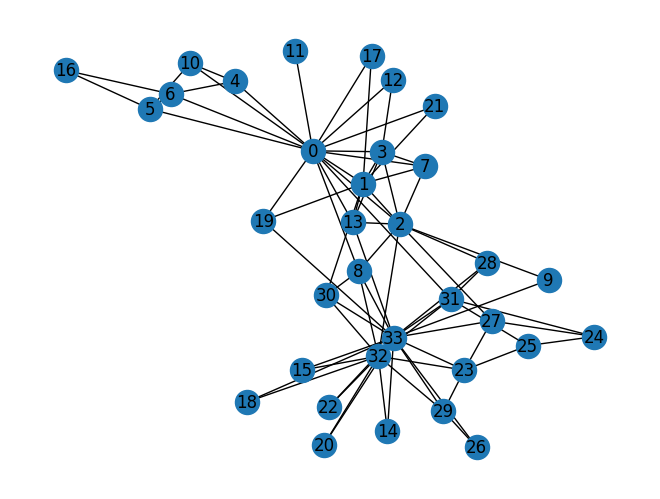

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()  # Built-in example graph

nx.draw(G, with_labels=True)
plt.show()

#### Common Customization Parameters

You can control node color, size, edge width, labels, etc.:

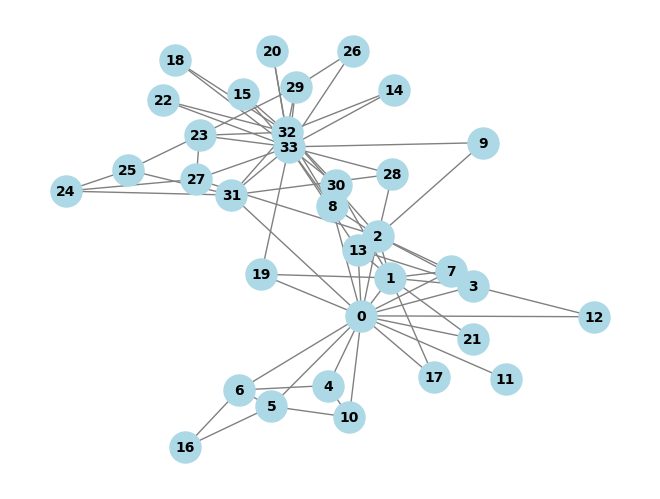

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()

nx.draw(
    G,
    with_labels=True,
    node_color='lightblue',
    node_size=500,
    edge_color='gray',
    font_size=10,
    font_weight='bold'
)
plt.show()

### Add and Visualizing attributes

Nodes and attributes:
A: {'color': 'white'}
B: {'color': 'red'}
C: {'color': 'green'}
D: {'color': 'blue'}
E: {'color': 'orange'}
F: {'color': 'yellow'}


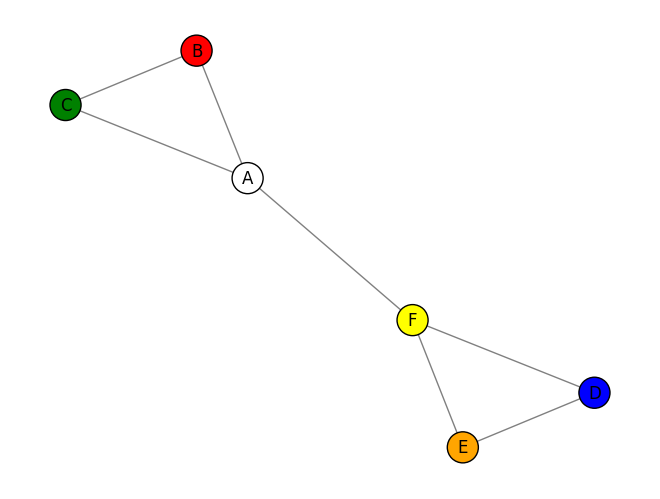

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Create undirected graph
G = nx.Graph([
    ('A', 'B'), ('B', 'C'), ('C', 'A'),
    ('D', 'E'), ('E', 'F'), ('F', 'D'), ('A', 'F')
])

# Assign node colors
node_colors = {'A': 'white', 'B': 'red', 'C': 'green', 'D': 'blue', 'E': 'orange', 'F': 'yellow'}
nx.set_node_attributes(G, node_colors, 'color')

# Print node attributes
print("Nodes and attributes:")
for node, data in G.nodes(data=True):
    print(f"{node}: {data}")

# Visualize graph
nx.draw(G,
        with_labels=True,
        node_color=[node_colors[node] for node in G.nodes()],
        node_size=500,
        font_size=12,
        edge_color='gray',
        edgecolors='black')
plt.axis('off')
plt.show()

Edge attributes:
(A, B): {'width': 1, 'color': (0.21764705882352942, 0.42912060877260894, 0.9755119679804366, 1.0)}
(A, C): {'width': 2, 'color': (0.0725490196078431, 0.7829276104921027, 0.9005867023006374, 1.0)}
(A, F): {'width': 3, 'color': (0.3549019607843137, 0.9741386021045101, 0.7829276104921028, 1.0)}
(B, C): {'width': 4, 'color': (0.6450980392156862, 0.9741386021045102, 0.622112816721474, 1.0)}
(D, E): {'width': 5, 'color': (0.9274509803921569, 0.7829276104921029, 0.43467642176596505, 1.0)}
(D, F): {'width': 6, 'color': (1.0, 0.42912060877260916, 0.2199463578396687, 1.0)}
(E, F): {'width': 7, 'color': (1.0, 1.2246467991473532e-16, 6.123233995736766e-17, 1.0)}


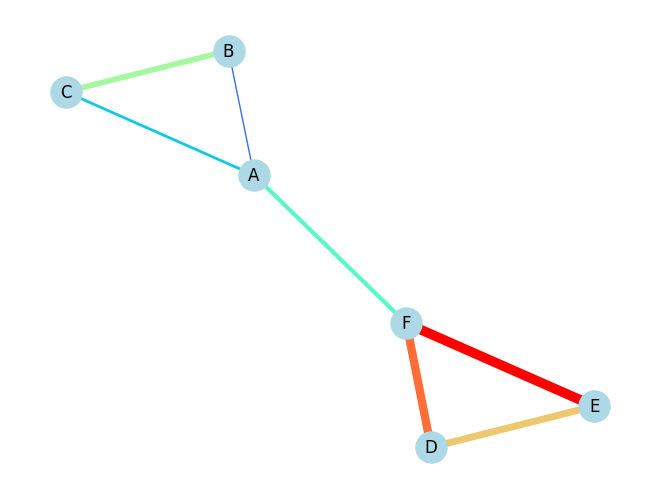

In [14]:
# pip install networkx matplotlib numpy
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create undirected graph
G = nx.Graph([
    ('A', 'B'), ('B', 'C'), ('C', 'A'),
    ('D', 'E'), ('E', 'F'), ('F', 'D'), ('A', 'F')
])

# Assign edge widths and colors
for i, (u, v) in enumerate(G.edges, 1):
    G[u][v]['width'] = i  # Widths 1 to 7
    G[u][v]['color'] = plt.cm.rainbow(i / 7)  # Rainbow colors

# Print edge attributes
print("Edge attributes:")
for u, v, data in G.edges(data=True):
    print(f"({u}, {v}): {data}")

# Visualize graph
nx.draw(G,
        with_labels=True,
        node_color='lightblue',
        node_size=500,
        font_size=12,
        
        edge_color=[G[u][v]['color'] for u, v in G.edges()],
        width=[G[u][v]['width'] for u, v in G.edges()])
plt.axis('off')
plt.show()

### Layouts

NetworkX provides several layout algorithms to position nodes
<table>
<thead>
<tr>
<th>Layout</th>
<th>Purpose</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>nx.spring_layout(G)</code></td>
<td>Force-directed (default in <code>draw</code>)</td>
</tr>
<tr>
<td><code>nx.circular_layout(G)</code></td>
<td>Nodes on a circle</td>
</tr>
<tr>
<td><code>nx.random_layout(G)</code></td>
<td>Random positions</td>
</tr>
<tr>
<td><code>nx.shell_layout(G)</code></td>
<td>Nodes in concentric circles</td>
</tr>
<tr>
<td><code>nx.kamada_kawai_layout(G)</code></td>
<td>Energy-based, good for small graphs</td>
</tr>
<tr>
<td><code>nx.planar_layout(G)</code></td>
<td>For planar graphs</td>
</tr>
</tbody>
</table>


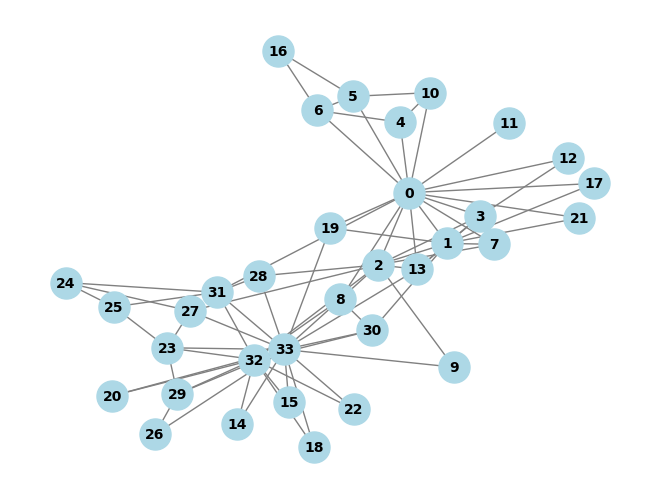

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()

pos = nx.spring_layout(G)  # Compute positions once
nx.draw(
    G,
    pos=pos, #<-----
    with_labels=True,
    node_color='lightblue',
    node_size=500,
    edge_color='gray',
    font_size=10,
    font_weight='bold'
)
plt.show()

V(g)$name equivalent (node labels):
['A', 'B', 'C', 'D', 'E', 'F']

vertex_attr(g) equivalent (node attributes):
A: {'color': 'white'}
B: {'color': 'red'}
C: {'color': 'green'}
D: {'color': 'blue'}
E: {'color': 'orange'}
F: {'color': 'yellow'}


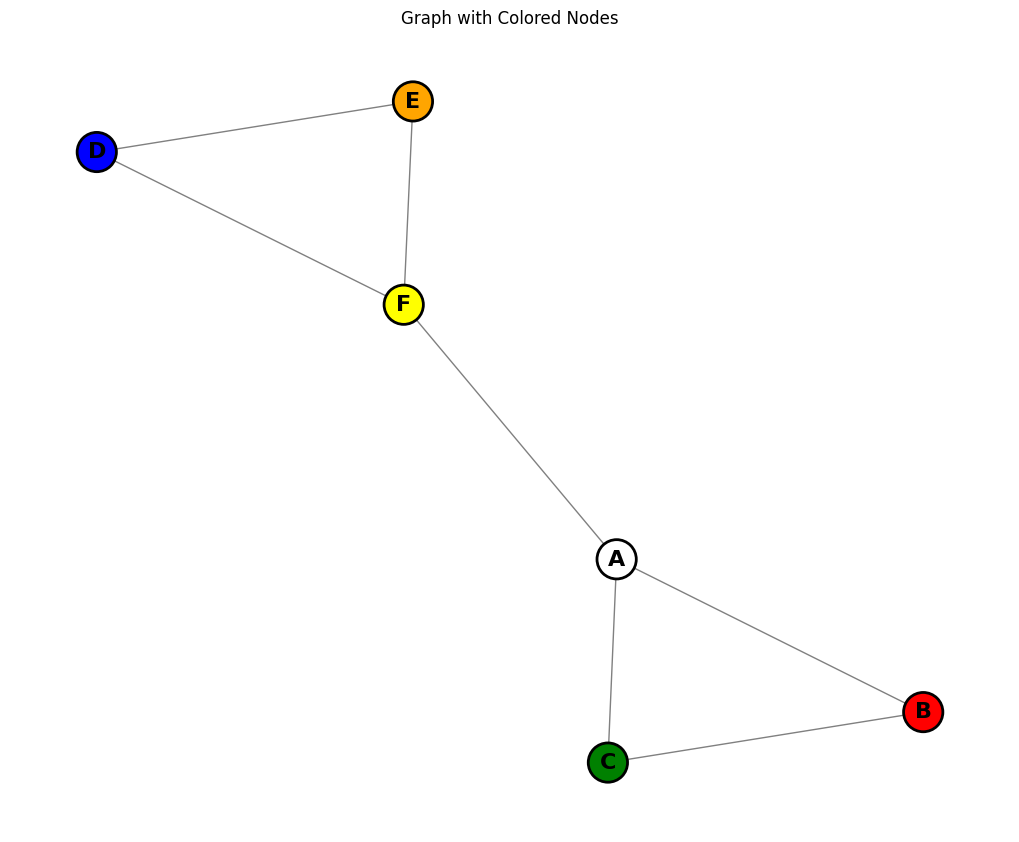

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Create the graph 
G = nx.Graph()
G.add_edges_from([
    ('A', 'B'),
    ('B', 'C'),
    ('C', 'A'),
    ('D', 'E'),
    ('E', 'F'),
    ('F', 'D'),
    ('A', 'F')
])

# Step 2: V(g)$name → In networkx, node names are the node identifiers themselves
print("V(g)$name equivalent (node labels):")
print(list(G.nodes()))  # ➜ ['A', 'B', 'C', 'D', 'E', 'F']

# Step 3: V(g)$color = c("white", "red", "green", "blue", "orange", "yellow")
node_colors = ["white", "red", "green", "blue", "orange", "yellow"]
color_map = {node: color for node, color in zip(G.nodes(), node_colors)}
nx.set_node_attributes(G, color_map, 'color')  # Store as node attribute

# Step 4: vertex_attr(g) → View all node attributes
print("\nvertex_attr(g) equivalent (node attributes):")
for node, data in G.nodes(data=True):
    print(f"{node}: {data}")

# Step 5: plot(g) with node colors
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

# Get color list in node order for plotting
node_color_list = [color_map[node] for node in G.nodes()]

nx.draw(G, pos,
        with_labels=True,
        node_color=node_color_list,
        node_size=800,
        font_size=16,
        font_weight='bold',
        edge_color='gray',
        linewidths=2,          # Add outline so 'white' nodes are visible
        edgecolors='black')    # 👈 important for white nodes!

plt.title("Graph with Colored Nodes")
plt.axis('off')
plt.show()

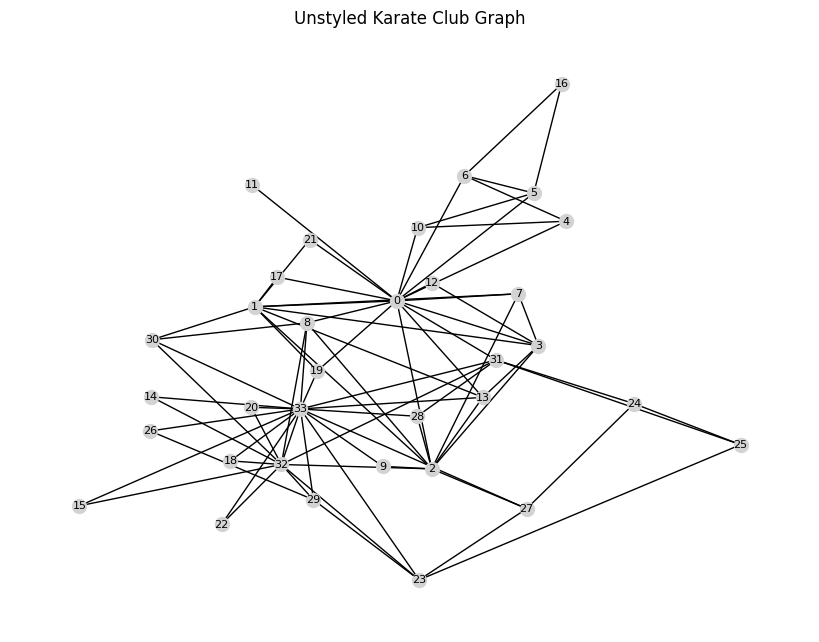

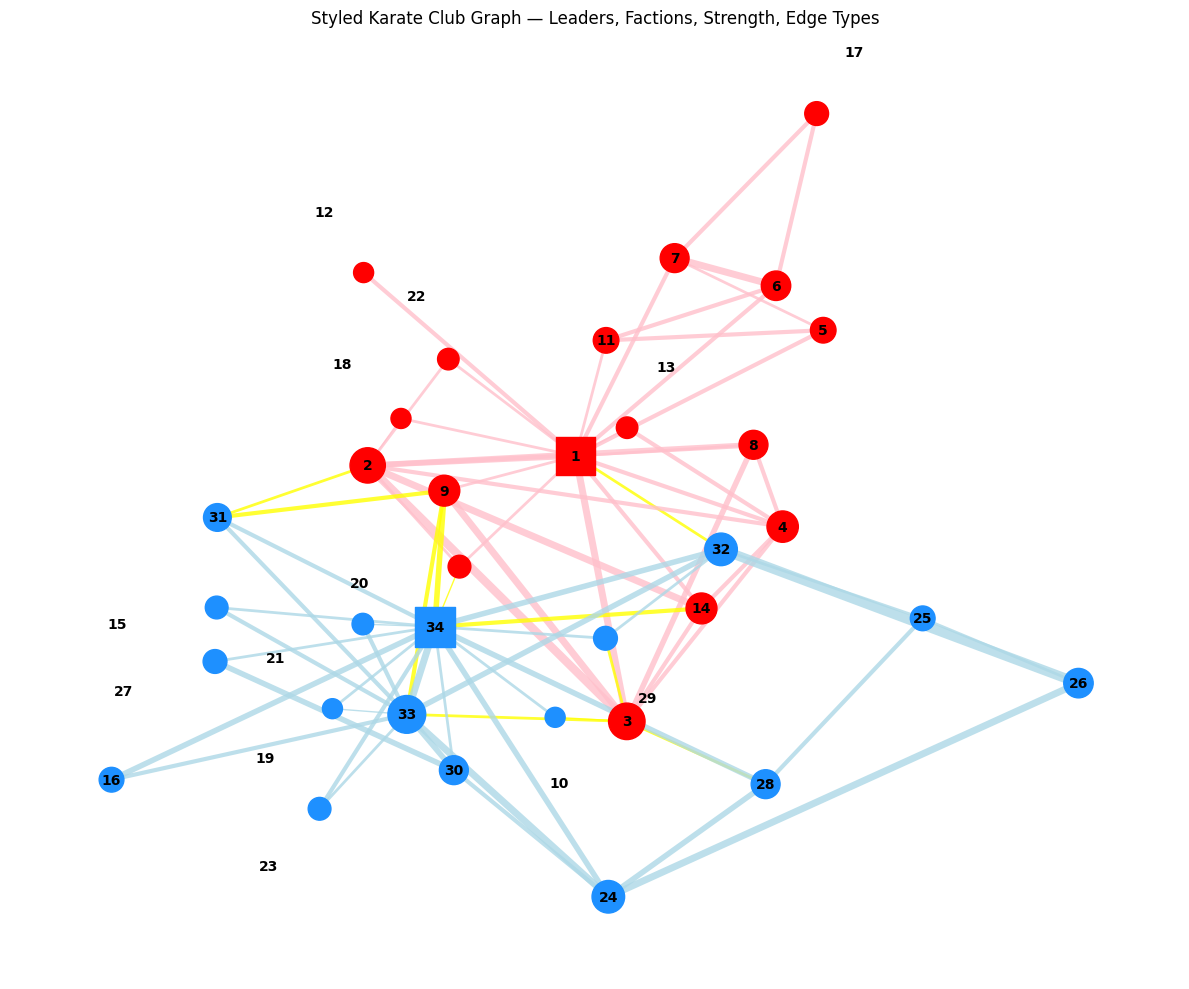

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the Karate Club graph
G = nx.karate_club_graph()

# Set layout reproducibly
np.random.seed(4321)
pos = nx.kamada_kawai_layout(G)

# Add 'Faction' attribute: 1 = Mr. Hi, 2 = Officer
clubs = nx.get_node_attributes(G, 'club')
faction = {node: 1 if club == 'Mr. Hi' else 2 for node, club in clubs.items()}
nx.set_node_attributes(G, faction, 'Faction')

# Create simple node labels ("1", "2", ..., "34")
labels = {i: str(i + 1) for i in G.nodes()}
nx.set_node_attributes(G, labels, 'label')

# Identify leaders (nodes 0 and 33)
leaders = [0, 33]
non_leaders = [n for n in G.nodes() if n not in leaders]

# Compute node strength (weighted degree) and size
strength = {
    node: sum(data.get('weight', 1) for _, _, data in G.edges(node, data=True))
    for node in G.nodes()
}
node_sizes = [4 * np.sqrt(strength[node]) * 30 for node in G.nodes()]

# Set node colors by faction
node_color_map = {1: 'red', 2: 'dodgerblue'}
node_colors = [node_color_map[faction[node]] for node in G.nodes()]

# Adjust label positions (move small-node labels outward)
label_pos = {}
for node in G.nodes():
    s = 4 * np.sqrt(strength[node])
    x, y = pos[node]
    if s >= 10:
        label_pos[node] = (x, y)
    else:
        direction = np.array([x, y])
        norm = np.linalg.norm(direction)
        if norm > 0:
            direction = direction / norm
        label_pos[node] = (x + direction[0] * 0.15, y + direction[1] * 0.15)

# Set edge colors based on factions
factions = nx.get_node_attributes(G, 'Faction')
edge_colors = []
for u, v in G.edges():
    if factions[u] == factions[v] == 1:
        edge_colors.append('pink')
    elif factions[u] == factions[v] == 2:
        edge_colors.append('lightblue')
    else:
        edge_colors.append('yellow')

# Edge widths (use weight or default to =1)
edge_widths = [data.get('weight', 1) for _, _, data in G.edges(data=True)]

# --- Plot 1: Simple version ---
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=100, node_color='lightgray', font_size=8)
plt.title("Unstyled Karate Club Graph")
plt.axis('off')
plt.show()

# --- Plot 2: Full styled version ---
plt.figure(figsize=(12, 10))

# Draw edges
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, alpha=0.8)

# Draw regular members (circles)
nx.draw_networkx_nodes(
    G, pos, nodelist=non_leaders,
    node_color=[node_colors[i] for i in non_leaders],
    node_size=[node_sizes[i] for i in non_leaders],
    node_shape='o'
)

# Draw leaders (squares)
nx.draw_networkx_nodes(
    G, pos, nodelist=leaders,
    node_color=[node_colors[i] for i in leaders],
    node_size=[node_sizes[i] for i in leaders],
    node_shape='s'
)

# Draw labels
nx.draw_networkx_labels(G, label_pos, labels=labels, font_size=10, font_weight='bold')

plt.title("Styled Karate Club Graph — Leaders, Factions, Strength, Edge Types")
plt.axis('off')
plt.tight_layout()
plt.show()